In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

In [2]:
df = pd.read_csv("dataset/preprocessed_train.csv")

In [3]:
df.head().T


,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,06/03/2016
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,0,0,0,0,0
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,495,608,665,630,622.769


In [4]:
lags_ordered_importance = ['7','14','1','2','9','8','6','15','21','13','20']
#using 8 lags for now, max n = 11
n_lags = 11
for i in range(n_lags):
    df['t-'+str(lags_ordered_importance[i])] = \
                df['NumberOfCustomers'].shift(int(lags_ordered_importance[i]))
    #dataset['t'] = series.values
    #dataset.head(20)
    #dataset = dataset[20:]
 

In [5]:
df =df[21:]

In [6]:
df.head().T

,21,22,23,24,25
StoreID,1000,1000,1000,1000,1000
Date,23/03/2016,24/03/2016,25/03/2016,26/03/2016,27/03/2016
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,1,1,1,0,0
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,541,626,625,511,622.769


RANDOM FOREST REGRESSION

In [7]:

df = df.drop(['NumberOfSales'], axis=1)

#df = df.drop(['Region','Events'], axis=1)
# I could leave events


In [8]:
#for now let's drop unusable categorical vars
df = df.drop(['StoreType','AssortmentType','Events'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [10]:
import modify_dataset as md
train = md.get_fake_train(df)
test = md.get_fake_test(df)

In [11]:
train.shape


(479184, 58)

In [12]:
test.shape

(43816, 58)

In [13]:
features = list(train.columns.values)
features.remove('NumberOfCustomers')
features.remove('StoreID')
features.remove('D_Year')
features.remove('Date')
features.remove('IsOpen')
print("features")

print(features)

features
['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'CloudCover', 'Max_Dew_PointC', 'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa', 'Min_TemperatureC', 'Min_VisibilitykM', 'Precipitationmm', 'WindDirDegrees', 'D_Day', 'D_DayOfYear', 'D_Month', 'StoreType_SuperMarket', 'StoreType_HyperMarket', 'StoreType_StandardMarket', 'StoreType_ShoppingCenter', 'AssortmentType_General', 'AssortmentType_WithNFDept', 'AssortmentType_WithFishDept', 'Events_Fog', 'Events_Hail', 'Events_Rain', 'Events_Snow', 'Events_Thunderstorm', 't-7', 't-14', 't-1', 't-2', 't-9', 't-8', 't-6', 't-15', 't-21', 't-13', 't-20']


In [14]:
train[features].head().T

,21,22,23,24,25
IsHoliday,0.00,0.0,0.0,0.000000,0.000000
HasPromotions,1.00,1.0,1.0,0.000000,0.000000
NearestCompetitor,326.00,326.0,326.0,326.000000,326.000000
Region,7.00,7.0,7.0,7.000000,7.000000
Region_AreaKM2,9643.00,9643.0,9643.0,9643.000000,9643.000000
Region_GDP,17130.00,17130.0,17130.0,17130.000000,17130.000000
Region_PopulationK,2770.00,2770.0,2770.0,2770.000000,2770.000000
CloudCover,6.00,6.0,5.0,7.000000,8.000000
Max_Dew_PointC,6.00,0.0,-1.0,-5.000000,-10.000000
Max_Humidity,100.00,87.0,93.0,64.000000,48.000000


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
model1 = RandomForestRegressor(n_estimators=4, max_depth=20, n_jobs=-1, verbose=2)

In [17]:
# Can I choose to give it numpy arrays or pandas df or I can only pass np arrays?
model1.fit(train[features], train['NumberOfCustomers'])

building tree 1 of 4building tree 2 of 4building tree 3 of 4building tree 4 of 4





[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [18]:
idx = model1.feature_importances_.argsort()[::-1]

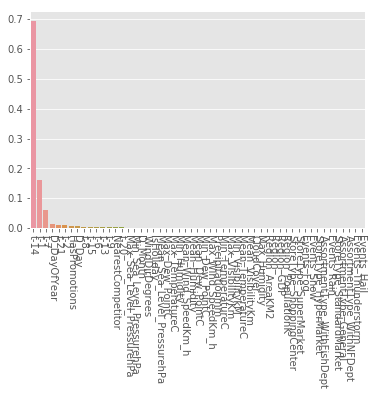

In [19]:
ax = sns.barplot(x=df[features].columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

In [20]:
df_days = test[((df['D_Month'] == 1) | (df['D_Month'] == 2)) & (df['D_Year'] == 2018)]

days = df_days['Date'].loc[:'Date'].values
len(days)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


43816

In [21]:
days=list(set(days))

In [22]:
len(days)

59

In [23]:
days=sorted(days)
days

['01/01/2018',
 '01/02/2018',
 '02/01/2018',
 '02/02/2018',
 '03/01/2018',
 '03/02/2018',
 '04/01/2018',
 '04/02/2018',
 '05/01/2018',
 '05/02/2018',
 '06/01/2018',
 '06/02/2018',
 '07/01/2018',
 '07/02/2018',
 '08/01/2018',
 '08/02/2018',
 '09/01/2018',
 '09/02/2018',
 '10/01/2018',
 '10/02/2018',
 '11/01/2018',
 '11/02/2018',
 '12/01/2018',
 '12/02/2018',
 '13/01/2018',
 '13/02/2018',
 '14/01/2018',
 '14/02/2018',
 '15/01/2018',
 '15/02/2018',
 '16/01/2018',
 '16/02/2018',
 '17/01/2018',
 '17/02/2018',
 '18/01/2018',
 '18/02/2018',
 '19/01/2018',
 '19/02/2018',
 '20/01/2018',
 '20/02/2018',
 '21/01/2018',
 '21/02/2018',
 '22/01/2018',
 '22/02/2018',
 '23/01/2018',
 '23/02/2018',
 '24/01/2018',
 '24/02/2018',
 '25/01/2018',
 '25/02/2018',
 '26/01/2018',
 '26/02/2018',
 '27/01/2018',
 '27/02/2018',
 '28/01/2018',
 '28/02/2018',
 '29/01/2018',
 '30/01/2018',
 '31/01/2018']

In [24]:
lags_list = ['t-14','t-7','t-1','t-2','t-9','t-8','t-6','t-15','t-21','t-13','t-20']

In [25]:
#saving cheat test to test with perfect lags later
test_cheat = md.get_fake_test(df)

In [26]:
df_train_test = df
df_train_test['_NumberOfCustomers'] = df_train_test['NumberOfCustomers']
df_train_test.loc[((df['D_Month'] == 1) | (df['D_Month'] == 2)) & (df['D_Year'] == 2018),\
                lags_list + ['_NumberOfCustomers']] = 0



In [27]:
df_train_test.loc[(df_train_test['D_Year'] == 2018)].T

,670,671,672,673,674,675,676,677,678,679,...,523011,523012,523013,523014,523015,523016,523017,523018,523019,523020
StoreID,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748
Date,01/01/2018,02/01/2018,03/01/2018,04/01/2018,05/01/2018,06/01/2018,07/01/2018,08/01/2018,09/01/2018,10/01/2018,...,19/02/2018,20/02/2018,21/02/2018,22/02/2018,23/02/2018,24/02/2018,25/02/2018,26/02/2018,27/02/2018,28/02/2018
IsHoliday,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IsOpen,1,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
HasPromotions,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
NearestCompetitor,326,326,326,326,326,326,326,326,326,326,...,4607,4607,4607,4607,4607,4607,4607,4607,4607,4607
Region,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
NumberOfCustomers,642,746,333,622.769,536,501,622.769,671,609,568,...,342,370,347,323,340,170,311.679,266,337,300
Region_AreaKM2,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,...,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,...,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130


In [28]:
# in order to avoid to re-run each time the whole notebook
df_train_test_ = df_train_test

store_rows_shapes = []

for d in days:
    stores_rows = df_train_test_.loc[(df_train_test_['Date'].values == d)]

    store_rows_shapes.append((stores_rows.shape, d))
    # stores_rows.head()

    lags_ordered = [7, 14, 1, 2, 9, 8, 6, 15, 21, 13, 20]
    lags_name = ['t-' + str(i) for i in lags_ordered]

    for i in range(len(lags_ordered)):
        stores_rows[lags_name[i]] = df_train_test_['_NumberOfCustomers'].shift(lags_ordered[i])

    # stores_pred = model.predict(stores_rows[features])
    stores_pred = model1.predict(stores_rows[features])
    # print(stores_pred[:5])
    df_stores_pred = pd.DataFrame(stores_pred, columns=['_NumberOfCustomers'], index=stores_rows.index)

    new_column = pd.Series(stores_pred, name='_NumberOfCustomers', index=stores_rows.index)
    df_train_test_.update(new_column)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s f

In [29]:
n = 2106
df_train_test_[n:n+50].T

,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,...,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176
StoreID,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,...,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
Date,31/12/2017,01/01/2018,02/01/2018,03/01/2018,04/01/2018,05/01/2018,06/01/2018,07/01/2018,08/01/2018,09/01/2018,...,09/02/2018,10/02/2018,11/02/2018,12/02/2018,13/02/2018,14/02/2018,15/02/2018,16/02/2018,17/02/2018,18/02/2018
IsHoliday,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IsOpen,0,1,1,1,0,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,0
HasPromotions,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
NearestCompetitor,370,370,370,370,370,370,370,370,370,370,...,370,370,370,370,370,370,370,370,370,370
Region,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
NumberOfCustomers,379.586,420,422,198,379.586,406,346,379.586,433,396,...,368,299,379.586,381,354,353,361,347,358,379.586
Region_AreaKM2,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407
Region_GDP,13155,13155,13155,13155,13155,13155,13155,13155,13155,13155,...,13155,13155,13155,13155,13155,13155,13155,13155,13155,13155


In [30]:
test = df_train_test_[((df['D_Month'] == 1) | (df['D_Month'] == 2)) & (df['D_Year'] == 2018)]

In [31]:
print(test.shape)
test.head(20).T

(43816, 59)


,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689
StoreID,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Date,01/01/2018,02/01/2018,03/01/2018,04/01/2018,05/01/2018,06/01/2018,07/01/2018,08/01/2018,09/01/2018,10/01/2018,11/01/2018,12/01/2018,13/01/2018,14/01/2018,15/01/2018,16/01/2018,17/01/2018,18/01/2018,19/01/2018,20/01/2018
IsHoliday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsOpen,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1
HasPromotions,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0
NearestCompetitor,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Region,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
NumberOfCustomers,642,746,333,622.769,536,501,622.769,671,609,568,512,552,486,622.769,657,619,580,584,621,534
Region_AreaKM2,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130


In [32]:
test_cheat['_NumberOfCustomers'] = model1.predict(test_cheat[features])

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
# calculationg R2

# calculate RSS
df_RSS = test_cheat
print(df_RSS.shape)

df_RSS['sqrd_diff'] = df_RSS.apply(lambda x: (x['NumberOfCustomers'] - x['_NumberOfCustomers'])**2, axis=1)

RSS = df_RSS['sqrd_diff'].sum()
print('RSS:', RSS)
df_RSS.head()

(43816, 59)
RSS: 98427522.06948788


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,Region_AreaKM2,Region_GDP,...,t-2,t-9,t-8,t-6,t-15,t-21,t-13,t-20,_NumberOfCustomers,sqrd_diff
670,1000,01/01/2018,0,1,0,326,7,642.000000,9643,17130,...,692.000000,768.000000,622.769231,862.000000,622.769231,681.0,757.0,609.0,731.000000,7921.000000
671,1000,02/01/2018,0,1,0,326,7,746.000000,9643,17130,...,622.769231,622.769231,928.000000,337.000000,817.000000,609.0,670.0,543.0,706.500000,1560.250000
672,1000,03/01/2018,0,1,0,326,7,333.000000,9643,17130,...,642.000000,928.000000,862.000000,622.769231,757.000000,543.0,791.0,602.0,423.500000,8190.250000
673,1000,04/01/2018,1,0,0,326,7,622.769231,9643,17130,...,746.000000,862.000000,337.000000,622.769231,670.000000,602.0,718.0,608.0,512.272621,12209.500835
674,1000,05/01/2018,0,1,0,326,7,536.000000,9643,17130,...,333.000000,337.000000,622.769231,692.000000,791.000000,608.0,768.0,767.0,682.778465,21543.917889


In [34]:
# calculate TSS

df_TSS = test_cheat
NS_mean = df_TSS['NumberOfCustomers'].mean()
print('NS_mean', NS_mean)

df_TSS['sqrd_diff'] = df_TSS.apply(lambda x:  (x['_NumberOfCustomers'] - NS_mean)**2, axis=1)
TSS = df_TSS['sqrd_diff'].sum()
print('TSS:', TSS)
df_TSS.head()

NS_mean 298.2849164113321
TSS: 875167452.290504


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,Region_AreaKM2,Region_GDP,...,t-2,t-9,t-8,t-6,t-15,t-21,t-13,t-20,_NumberOfCustomers,sqrd_diff
670,1000,01/01/2018,0,1,0,326,7,642.000000,9643,17130,...,692.000000,768.000000,622.769231,862.000000,622.769231,681.0,757.0,609.0,731.000000,187242.343565
671,1000,02/01/2018,0,1,0,326,7,746.000000,9643,17130,...,622.769231,622.769231,928.000000,337.000000,817.000000,609.0,670.0,543.0,706.500000,166639.554469
672,1000,03/01/2018,0,1,0,326,7,333.000000,9643,17130,...,642.000000,928.000000,862.000000,622.769231,757.000000,543.0,791.0,602.0,423.500000,15678.817158
673,1000,04/01/2018,1,0,0,326,7,622.769231,9643,17130,...,746.000000,862.000000,337.000000,622.769231,670.000000,602.0,718.0,608.0,512.272621,45790.737590
674,1000,05/01/2018,0,1,0,326,7,536.000000,9643,17130,...,333.000000,337.000000,622.769231,692.000000,791.000000,608.0,768.0,767.0,682.778465,147835.289173


In [35]:
# calculate R2
print("RSS:", RSS, "   TSS:", TSS)

R2 = 1 - (RSS / TSS)
print('R_2:', R2)



RSS: 98427522.06948788    TSS: 875167452.290504
R_2: 0.8875329266280623


In [36]:
df.head().T

,21,22,23,24,25
StoreID,1000,1000,1000,1000,1000
Date,23/03/2016,24/03/2016,25/03/2016,26/03/2016,27/03/2016
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,1,1,1,0,0
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,541,626,625,511,622.769
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


In [37]:
df.to_csv('./dataset/RFR_lag_on_cust.csv', index=False)